# Importing Libraries

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_regression import plot_stat, apply_regression
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

In [3]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.0) #zero mean gaussian noise has variance = var
print(np.max(y))

1.2195347797082343


In [4]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [5]:
print("own OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.055569743937155844
Test MSE 0.05484915269841283
Train R2 1.1102230246251565e-16
Test R2 -0.0011898471973799118
Train bias 0.05556974393715585
Test bias -0.00807369500053035
Train model variance 1.232595164407831e-32
Test model variance 1.232595164407831e-32

Scikit OLS
Train MSE 0.0554353215610911
Test MSE 0.05606055800733091
Train R2 1.1102230246251565e-16
Test R2 -0.001450960349163699
Train bias 0.05543532156109111
Test bias -0.009012424441606774
Train model variance 3.0814879110195774e-33
Test model variance 3.0814879110195774e-33


In [7]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.001400365850011262
Test MSE 0.001416550294625316
Train R2 0.9747610509835095
Test R2 0.974449053769543
Train bias 0.0018561822550557522
Test bias 0.0018510144119647236
Train model variance 0.0018091974329503475
Test model variance 0.001823319135459158


## Apply OLS with cross validation sampling

In [7]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014021255975988467
Test MSE 0.0014102574103709476
Train R2 0.9747339966161601
Test R2 0.9744977650907005
Train bias 0.005560765574178797
Test bias 0.0054469488260608075
Train model variance 0.005422561804787444
Test model variance 0.0052215504361173715


## Apply Ridge regression 

In [8]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
Train MSE 0.005649906393093407
Test MSE 0.005892567898091898
Train R2 0.8977509606472367
Test R2 0.8977775673389139
Train bias 0.05525633470641179
Test bias -0.000229482759309803
Train model variance 0.04766037735058486
Test model variance 0.049792089937552006

scikit ridge
Train MSE 0.005685362114320993
Test MSE 0.005553636420531944
Train R2 0.8977451981220385
Test R2 0.8982274735655175
Train bias 0.05559995962149131
Test bias 0.0017077618589113833
Train model variance 0.04796363913122434
Test model variance 0.046915927207522926


## Apply Ridge regression with bootstrap

In [9]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.005666304067194039
Test MSE 0.005697070332783274
Train R2 0.8980162285907588
Test R2 0.8972608720672899
Train bias 0.001873230368256194
Test bias 0.0018615297061123587
Train model variance 0.0016145247329392325
Test model variance 0.0016299907863510758


## Apply Ridge regression with cross validation

In [10]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.003587326064229156
Test MSE 0.0035986156245132483
Train R2 0.9353589938868758
Test R2 0.9351435303182732
Train bias 0.005580735889040789
Test bias 0.005257187030881706
Train model variance 0.005023396459090771
Test model variance 0.00482035206711752


## Apply Lasso regression: Not working properly. High R2 value

In [15]:
lam = np.logspace(-4,0,17)
print(lam)
for lmbda in lam:
    linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_lasso", lmbda=lmbda)
    print("Test MSE", linear_reg.testMSE)

"""
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)
"""

[1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]


C:\Users\haris\Documents\Study\Machine Learning\Oslo\CompSci-Project-1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.933e+00, tolerance: 1.487e-01
  model = cd_fast.enet_coordinate_descent(


Test MSE 0.006261398758171209


C:\Users\haris\Documents\Study\Machine Learning\Oslo\CompSci-Project-1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+00, tolerance: 1.484e-01
  model = cd_fast.enet_coordinate_descent(


Test MSE 0.006254696102696025


C:\Users\haris\Documents\Study\Machine Learning\Oslo\CompSci-Project-1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+00, tolerance: 1.490e-01
  model = cd_fast.enet_coordinate_descent(


Test MSE 0.007751010552636894


C:\Users\haris\Documents\Study\Machine Learning\Oslo\CompSci-Project-1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.442e-01, tolerance: 1.482e-01
  model = cd_fast.enet_coordinate_descent(


Test MSE 0.008621341447627216
Test MSE 0.00986495413965978
Test MSE 0.010863848801717148
Test MSE 0.015212176906124824
Test MSE 0.016596165442946783
Test MSE 0.017905498500045483
Test MSE 0.029800070811785005
Test MSE 0.04910773896012125
Test MSE 0.062186000373080905
Test MSE 0.06235603454743998
Test MSE 0.08896375148882163
Test MSE 0.162682247345377
Test MSE 0.17060504260414286
Test MSE 0.17117533249868344


'\nprint("Train MSE", linear_reg.trainMSE)\nprint("Test MSE", linear_reg.testMSE)\nprint("Train R2", linear_reg.trainR2)\nprint("Test R2", linear_reg.testR2)\nprint("Train bias", linear_reg.trainbias)\nprint("Test bias", linear_reg.testbias)\nprint("Train model variance", linear_reg.trainvar)\nprint("Test model variance", linear_reg.testvar)\n'

# Regression Comparisons

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

## Widget to compare all experiments

In [21]:
order = np.load("data/order.npy")
num_points = np.load("data/num_points.npy")
noise_var = np.load("data/noise_var.npy")
test_ratio_array = np.load("data/test_ratio_array.npy")
k_folds = np.load("data/k_folds.npy")
n_boots = np.load("data/n_boots.npy")
ridge_lambda = np.load("data/ridge_lambda.npy")
lasso_lambda = np.load("data/lasso_lambda.npy")


methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation",
           "lasso", "lasso_bootstrap", "lasso_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]
print(lasso_lambda)
widget.interact(plot_stat, ratio=test_ratio_array.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist())

[1.e-05 1.e-04 1.e-03 1.e-02]


interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.3, 0.4), value=0.1), Dropdown(descrip…

<function regression_analysis.fit_model.apply_regression.plot_stat(ratio=0.1, num=100, stat='test MSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0, lasso_lmb=112.2)>

# Edge cases study of OLS

## Worst case study
What is the lowest possible MSE that we can get for data normalised to the range [0,1]?
This will happen when half of the data is 0 and the other half is 1, and if we fit a polynomial of order p such that p<<n where n is the number of data points. Then we will end up fitting a constant which is 0.5. What is MSE in this case?

In [21]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = np.zeros(xx1.shape)
y[::2, :]+=1.0
print("mean of the output is ", np.mean(y))

print("fitting a constant")
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("fitting a 10th order polynomial")
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("The worst possible MSE for data normalised to range [0,1] is ", 
      linear_reg.testMSE, "and is almost independent of the order of the polynomial used to fit such that the order of polynomial is much less than the number of data points")

mean of the output is  0.5
fitting a constant
1.0
Train MSE 0.24999998690246913
Test MSE 0.2500002488530864
Train R2 0.0
Test R2 -5.239034577719792e-06
Test bias 0.2500002488530864
Test model variance 4.930380657631324e-32
fitting a 10th order polynomial
Train MSE 0.2499844766462943
Test MSE 0.25002250913947766
Train R2 6.207563814819572e-05
Test R2 -9.147668963715994e-05
Test bias 0.2500000181536983
Test model variance 1.5761183272105358e-05
The worst possible MSE for data normalised to range [0,1] is  0.25002250913947766 and is almost independent of the order of the polynomial used to fit such that the order of polynomial is much less than the number of data points


## Fitting uniform random numbers
What will happen if we use OLS to fit data which is essentially a random uniform number between 0 and 1 irrespective of the value of the dependent variables. What is the MSE in this situation?

In [22]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = np.random.uniform(size=xx1.shape)
print("mean of the output is ", np.mean(y))

print("fitting a constant")
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("fitting a 10th order polynomial")
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

mean of the output is  0.4998943423016305
fitting a constant
1.0
Train MSE 0.08320567246045303
Test MSE 0.08326976836921827
Train R2 0.0
Test R2 -6.311058000862957e-06
Test bias 0.08326976836921827
Test model variance 2.7733391199176196e-32
fitting a 10th order polynomial
Train MSE 0.08318059037690845
Test MSE 0.08345183115907492
Train R2 6.511236631034922e-05
Test R2 -6.380960747365272e-05
Test bias 0.08344673105741923
Test model variance 5.380323678161109e-06


## Fitting gaussian data
What will happen if we use OLS to fit data which is essentially a truncated gaussian number between 0 and 1 where the output is independent of the dependant variables. What is the MSE in this situation?

mean of the output is  0.5001514982777048
variance of the output is  0.01001734013304885
fitting a constant
1.0
Train MSE 0.010410527847189622
Test MSE 0.01035537464494297
Train R2 0.0
Test R2 -8.827202577776916e-07
Test bias 0.010355374644942968
Test model variance 1.1093356479670479e-31
fitting a 10th order polynomial
Train MSE 0.010396824986015171
Test MSE 0.010472374349807426
Train R2 6.7185989994889e-05
Test R2 -9.958962834399898e-06
Test bias 0.010472491497846166
Test model variance 7.028846161102209e-07
mean of the output is  0.49958714674243754
variance of the output is  0.0391254226230149
fitting a constant
1.0
Train MSE 0.03914570554073006
Test MSE 0.03894295887597739
Train R2 0.0
Test R2 -2.1188463769972188e-05
Test bias 0.0389429588759774
Test model variance 3.0814879110195774e-33
fitting a 10th order polynomial
Train MSE 0.039123458441352205
Test MSE 0.039121357466395286
Train R2 6.617060095381877e-05
Test R2 -4.638985965743636e-05
Test bias 0.03911984007381804
Test model 

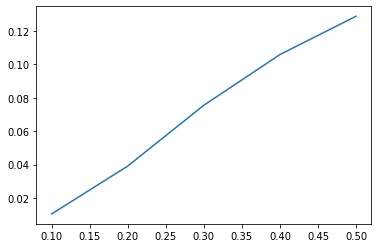

In [24]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

var = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
MSE = np.zeros(len(var))

for ind, variance in enumerate(var):

    y = np.random.normal(loc=0.5, scale = variance, size=xx1.shape)
    y[np.where(y>1.0)] = 1.0
    y[np.where(y<0.0)] = 0.0

    print("mean of the output is ", np.mean(y))
    print("variance of the output is ", np.var(y))

    print("fitting a constant")
    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
    linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)

    print("fitting a 10th order polynomial")
    linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    
    MSE[ind] = linear_reg.testMSE

plt.plot(var, MSE)

## Fitting a 2D gaussian function

# Bias Variance Tradeoff

In [36]:
#loading data
method = "ols"
order=np.load("data/order.npy")
num_points=np.load("data/num_points.npy")
noise_var=np.load("data/noise_var.npy")
test_ratio_array=np.load("data/test_ratio_array.npy")
ridge_lambda=np.load("data/ridge_lambda.npy")
k_folds=np.load("data/k_folds.npy")
n_boots=np.load("data/n_boots.npy")
train_MSE=np.load("data/train_MSE"+method+".npy")
test_MSE=np.load("data/test_MSE"+method+".npy")
train_R2=np.load("data/train_R2"+method+".npy")
test_R2=np.load("data/test_R2"+method+".npy")
test_bias=np.load("data/test_bias"+method+".npy")
test_var=np.load("data/test_variance"+method+".npy")

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

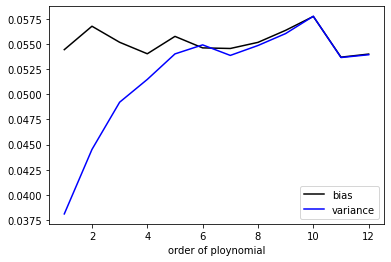

interactive(children=(Dropdown(description='num_point', options=(25, 50, 75, 100), value=25), Dropdown(descrip…

<function __main__.plotOLSstats(num_point, test_ratio, var)>

In [37]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k', label = "bias")
ax.plot(order, ols_var, 'b', label = "variance")
ax.legend()
ax.set_xlabel("order of ploynomial")

def plotOLSstats(num_point, test_ratio, var):
    n_ind = 0
    for i in range(len(num_points)):
        if num_point == num_points[i]:
            n_ind = i
    r_ind = 0
    for i in range(len(test_ratio_array)):
        if test_ratio == test_ratio_array[i]:
            r_ind = i
    noise_ind = 0
    for i in range(len(noise_var)):
        if var == noise_var[i]:
            r_ind = i
            
    ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
    ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

    fig, ax = plt.subplots()
    ax.plot(order, ols_bias, 'k', label = "bias")
    ax.plot(order, ols_var, 'b', label = "variance")
    ax.legend()
    ax.set_xlabel("order of ploynomial")
    
widget.interact(plotOLSstats, num_point=num_points.tolist(), 
                test_ratio=test_ratio_array.tolist(), var=noise_var.tolist())

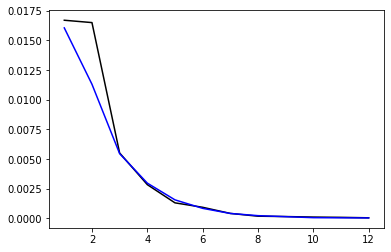

In [26]:
r_ind = 0 # r=0.1
n_ind = 0 # n=100
noise_ind = 4 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k')
ax.plot(order, ols_trainMSE, 'b')

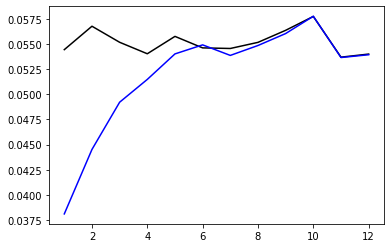

In [27]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k')
ax.plot(order, ols_var, 'b')

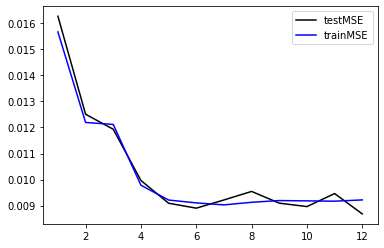

In [32]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k', label="testMSE")
ax.plot(order, ols_trainMSE, 'b', label="trainMSE")
ax.legend()

## Functions of model complexity for OLS

In [20]:
def OLS_study(n, var, r):
    n=np.array([n])
    var=np.array([var])
    r=np.array([r])
    print(var)
    order = np.arange(1,15)
    method="ols"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, noise_var = var, test_ratio_array=r)
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
widget.interact(OLS_study, n=(10,200,10), var=(0,1,0.1), r=(0.1,0.5,0.1))

interactive(children=(IntSlider(value=100, description='n', max=200, min=10, step=10), FloatSlider(value=0.0, …

<function __main__.OLS_study(n, var, r)>

In [18]:
def lasso_study(n, var, r, lam):
    n = np.array([n])
    var = np.array([var])
    r = np.array([r])
    lam = np.array([lam])
    order = np.arange(1,11)
    method = "lasso"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, var,
                                                                                   r, lasso_lambda=lam, reg_type="lasso")
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
import warnings
warnings.filterwarnings("ignore")
widget.interact(lasso_study, n=(10,50,10), var=(0,1,0.25), r=(0.1,0.5,0.1), lam=np.logspace(-5,0,11).tolist())

interactive(children=(IntSlider(value=30, description='n', max=50, min=10, step=10), FloatSlider(value=0.0, de…

<function __main__.lasso_study(n, var, r, lam)>

<IPython.core.display.Javascript object>


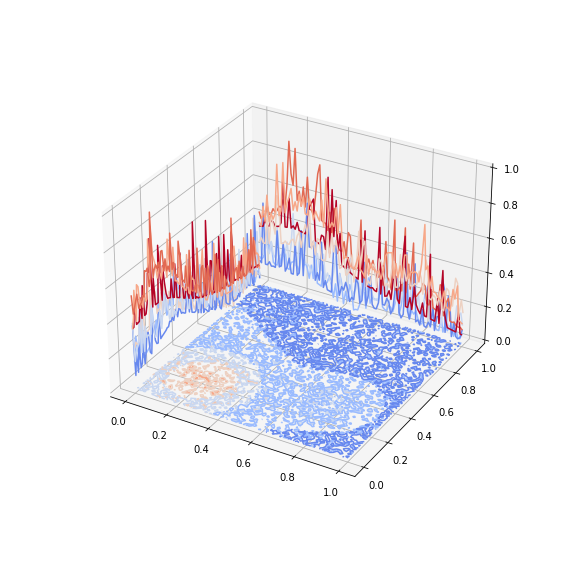

In [55]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.4) #zero mean gaussian noise
xx1 = xx1.reshape([n,n])
xx2 = xx2.reshape([n,n])

y = y.reshape(n,n)

#rescaling y
y = (y-np.amin(y))/(np.amax(y)-np.amin(y))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
#ax.plot_surface(xx1, xx2, y, rstride=8, cstride=8, alpha=0.2, cmap=cm.coolwarm)
cset = ax.contour(xx1, xx2, y, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(xx1, xx2, y, zdir='x', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(xx1, xx2, y, zdir='y', offset=1, cmap=cm.coolwarm_r)


<IPython.core.display.Javascript object>


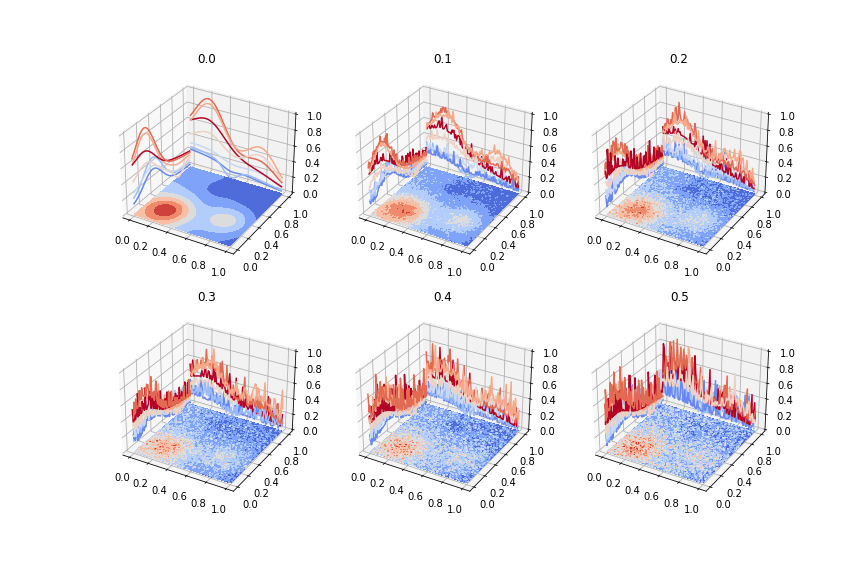

In [79]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

noise_var = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

fig, ax = plt.subplots(2, 3,subplot_kw={"projection": "3d"}, figsize=(12,8))
for ind, var in enumerate(noise_var):
    y = franke.Franke(xx1, xx2, noise_var=var) #zero mean gaussian noise
    xx1 = xx1.reshape([n,n])
    xx2 = xx2.reshape([n,n])

    y = y.reshape(n,n)
    #rescaling y
    y = (y-np.amin(y))/(np.amax(y)-np.amin(y))
    
    if(ind<3): a = 0 
    else: a = 1

    #ax[a, ind%3].plot_surface(xx1, xx2, y, rstride=8, cstride=8, alpha=0.2, cmap=cm.coolwarm)
    ax[a, ind%3].title.set_text(str(var))
    cset = ax[a, ind%3].contourf(xx1, xx2, y, zdir='z', offset=0, cmap=cm.coolwarm)
    cset = ax[a, ind%3].contour(xx1, xx2, y, zdir='x', offset=0, cmap=cm.coolwarm_r)
    cset = ax[a, ind%3].contour(xx1, xx2, y, zdir='y', offset=1, cmap=cm.coolwarm_r)
